In [1]:
%load_ext autoreload

In [2]:
%autoreload
 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from Visualizer import Visualizer
from Preprocessor import Preprocessor
from Model import Model
from TestModel import TestModel
from flaml import AutoML
from subway_clean import Mordi
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

In [3]:
preprocessor = Preprocessor()
apartments = preprocessor.apartments

In [4]:
apartments_test = preprocessor.apartments_test
buildings = preprocessor.buildings
buildings_test = preprocessor.buildings_test
merged = preprocessor.merged.copy()
merged_test = preprocessor.merged_test.copy()
labels = merged["price"]
merged_final = pd.concat([merged, merged_test], ignore_index=True)
print(f"The dataframe now has {len(merged_final)} entries")

The dataframe now has 33222 entries


In [5]:
visualizer = Visualizer()
visualizer.list_missing(merged_final.copy())

Total length: 33222
id: Amount: 0 | 0.0%
seller: Amount: 12772 | 38.44%
price: Amount: 9937 | 29.91%
area_total: Amount: 0 | 0.0%
area_kitchen: Amount: 6954 | 20.93%
area_living: Amount: 5901 | 17.76%
floor: Amount: 0 | 0.0%
rooms: Amount: 0 | 0.0%
layout: Amount: 25010 | 75.28%
ceiling: Amount: 16111 | 48.49%
bathrooms_shared: Amount: 5589 | 16.82%
bathrooms_private: Amount: 5589 | 16.82%
windows_court: Amount: 11560 | 34.8%
windows_street: Amount: 11560 | 34.8%
balconies: Amount: 15355 | 46.22%
loggias: Amount: 15355 | 46.22%
condition: Amount: 13769 | 41.45%
phones: Amount: 120 | 0.36%
building_id: Amount: 0 | 0.0%
new: Amount: 373 | 1.12%
latitude: Amount: 2 | 0.01%
longitude: Amount: 2 | 0.01%
district: Amount: 155 | 0.47%
street: Amount: 0 | 0.0%
address: Amount: 0 | 0.0%
constructed: Amount: 1168 | 3.52%
material: Amount: 5643 | 16.99%
stories: Amount: 0 | 0.0%
elevator_without: Amount: 537 | 1.62%
elevator_passenger: Amount: 537 | 1.62%
elevator_service: Amount: 537 | 1.62%
par

In [6]:
general_removed = preprocessor.general_removal(merged_final.copy())
data = preprocessor.remove_NaNs(general_removed.copy())
visualizer.list_missing(data)

Total length: 33222
id: Amount: 0 | 0.0%
seller: Amount: 0 | 0.0%
price: Amount: 9937 | 29.91%
area_total: Amount: 0 | 0.0%
area_kitchen: Amount: 0 | 0.0%
area_living: Amount: 0 | 0.0%
floor: Amount: 0 | 0.0%
rooms: Amount: 0 | 0.0%
bathrooms_shared: Amount: 0 | 0.0%
bathrooms_private: Amount: 0 | 0.0%
windows_court: Amount: 0 | 0.0%
windows_street: Amount: 0 | 0.0%
phones: Amount: 0 | 0.0%
building_id: Amount: 0 | 0.0%
new: Amount: 0 | 0.0%
latitude: Amount: 0 | 0.0%
longitude: Amount: 0 | 0.0%
district: Amount: 0 | 0.0%
constructed: Amount: 0 | 0.0%
material: Amount: 0 | 0.0%
stories: Amount: 0 | 0.0%
elevator_passenger: Amount: 0 | 0.0%
elevator_service: Amount: 0 | 0.0%
parking: Amount: 0 | 0.0%
garbage_chute: Amount: 0 | 0.0%
heating: Amount: 0 | 0.0%


In [7]:
data = preprocessor.logify(data.copy(), "price")
#data = preprocessor.logify(data.copy(), "area_total")
data = preprocessor.logify(data.copy(), "area_living")
data = preprocessor.remove_zero_values(data.copy(), "area_living")
data = preprocessor.logify(data.copy(), "area_kitchen")

In [8]:
is_outlier = (data["longitude"] > 55) | (data["latitude"] < 54)
outliers = data.copy()[is_outlier]
removed_outliers = preprocessor.fix_latlon_outliers(data.copy(), outliers)

In [9]:
featured = preprocessor.combine_latlon_subway(removed_outliers.copy(),True)
featured = preprocessor.combine_area_rooms(featured.copy())
featured = preprocessor.combine_baths(featured.copy())
featured = preprocessor.combine_windows(featured.copy())
featured = preprocessor.combine_windows(featured.copy(), boolean=True)
featured = preprocessor.combine_latlon(featured.copy())
featured = preprocessor.combine_elevators(featured.copy())
featured = preprocessor.redo_new(featured.copy())
featured = preprocessor.combine_new_constructed_distance(featured.copy())
featured = preprocessor.combine_floor_stories(featured.copy())
featured = preprocessor.combine_district_city_center(featured.copy())
featured = preprocessor.combine_area_total_city_center(featured.copy())
featured = preprocessor.area_score(featured.copy())
featured = preprocessor.apartment_score(featured.copy())
featured = preprocessor.square_diff(featured.copy())

featured = preprocessor.closest_hospital(featured.copy())
featured = preprocessor.closest_park(featured.copy())

featured = preprocessor.distance_luxury_village(featured.copy())
featured = preprocessor.closest_uni(featured.copy())
featured = preprocessor.inside_golden_mile(featured.copy())
featured = preprocessor.distance_from_golden_mile(featured.copy())

featured = preprocessor.inside_khamovniki(featured.copy())
featured = preprocessor.distance_from_khamovniki_center(featured.copy())

featured = preprocessor.inside_yakimanka(featured.copy())
featured = preprocessor.inside_arbat(featured.copy())
featured = preprocessor.inside_tverskoy(featured.copy())

featured = preprocessor.distance_to_closest_powerplant(featured.copy())
featured = preprocessor.distance_to_closest_museum(featured.copy())
featured = preprocessor.distance_to_closest_stadium(featured.copy())
featured = preprocessor.distance_to_closest_theater(featured.copy())
featured = preprocessor.distance_to_closest_church(featured.copy())
featured = preprocessor.distance_to_closest_railway(featured.copy())
featured = preprocessor.distance_to_closest_airport(featured.copy())

featured = preprocessor.distance_from_vnukovo(featured.copy())
featured = preprocessor.distance_from_sheremetyevo(featured.copy())
featured = preprocessor.distance_from_domodedovo(featured.copy())
featured = preprocessor.distance_from_zhukovsky(featured.copy())
featured = preprocessor.distance_from_ostafyevo(featured.copy())

featured = preprocessor.bathroom_fraction(featured.copy())
featured = preprocessor.floor_fraction(featured.copy())

#visualizer.price_correlation(featured)
#featured = preprocessor.logify(featured.copy(),"closest_hospital")

#categorical = preprocessor.split_categorical_features(featured.copy(), ["seller", "district","material", "has_elevator"])
#categorical = preprocessor.split_categorical_features(featured.copy(), ["district", "material"])

In [10]:
featured["area_score"] = np.log10(featured.copy()["area_score"])
featured = preprocessor.logify(featured.copy(),"area_total_distance")
featured = preprocessor.logify(featured.copy(),"scaled_constructed")
featured = preprocessor.logify(featured.copy(),"distance_center")
featured = preprocessor.logify(featured.copy(),"closest_park")
featured = preprocessor.logify(featured.copy(),"closest_uni")
featured = preprocessor.logify(featured.copy(),"distance_luxurary_village")
featured = preprocessor.logify(featured.copy(),"distance_khamovniki_center")
featured = preprocessor.logify(featured.copy(),"distance_closest_powerplant")
featured = preprocessor.logify(featured.copy(),"distance_golden_mile")
featured = preprocessor.logify(featured.copy(),"distance_closest_museum")
featured = preprocessor.logify(featured.copy(),"distance_closest_stadium")
featured = preprocessor.logify(featured.copy(),"distance_closest_theater")
featured = preprocessor.logify(featured.copy(),"distance_closest_church")
featured = preprocessor.logify(featured.copy(),"distance_closest_railway")
featured = preprocessor.logify(featured.copy(),"distance_closest_airport")
featured = preprocessor.logify(featured.copy(),"distance_from_vnukovo_airport")
featured = preprocessor.logify(featured.copy(),"distance_from_sheremetyevo_airport")
featured = preprocessor.logify(featured.copy(),"distance_from_domodedovo_airport")
featured = preprocessor.logify(featured.copy(),"distance_from_zhukovsky_airport")
featured = preprocessor.logify(featured.copy(),"distance_from_ostafyevo_airport")

(33222, 53)

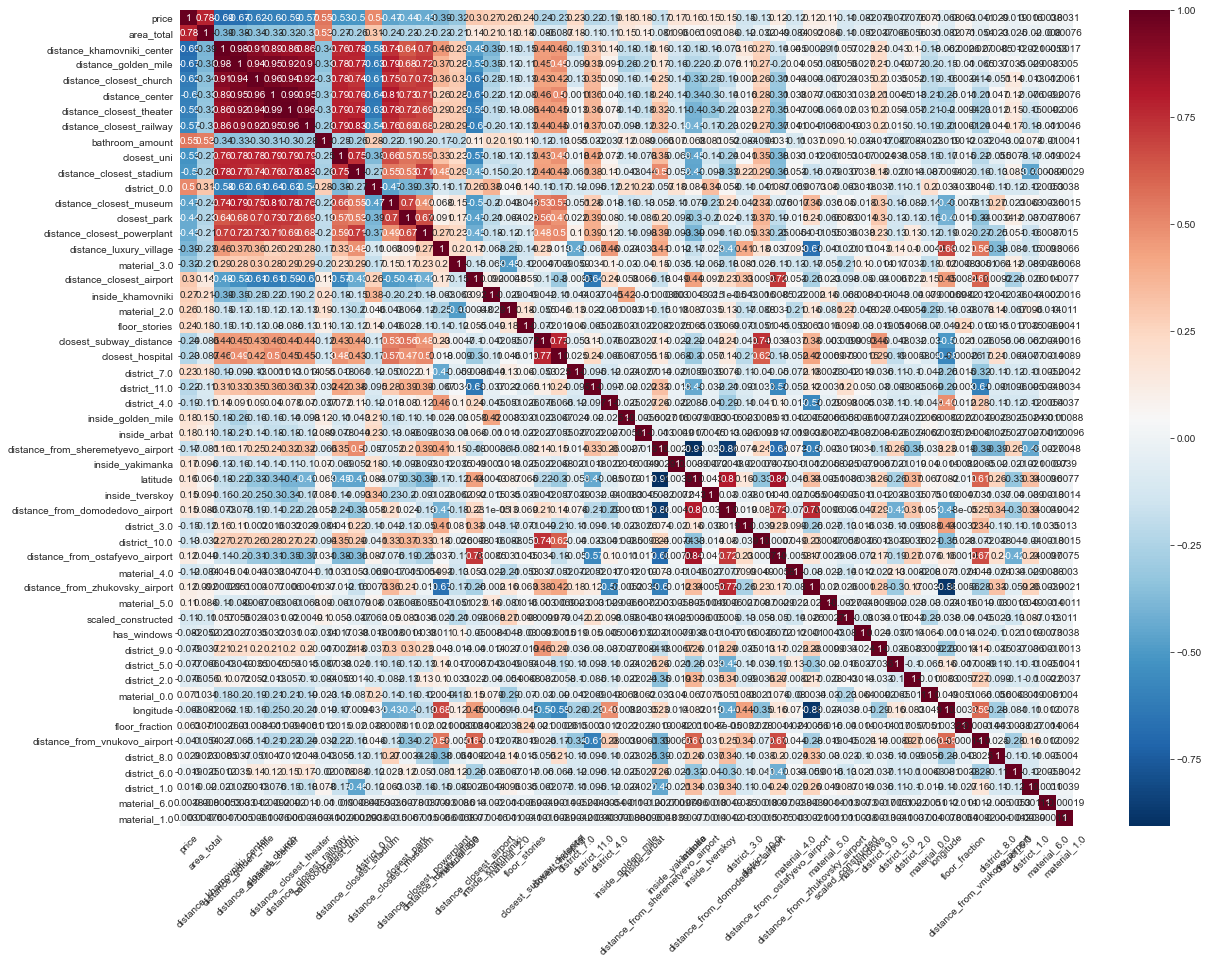

In [11]:
categorical = preprocessor.split_categorical_features(featured.copy(), ["district", "material"])
#lmao= preprocessor.remove_labels(categorical.copy(), ["material_1.0","material_6.0","district_1.0","district_6.0","district_8.0","has_elevator_1","seller_3.0","material_0.0","district_2.0","district_5.0","district_9.0"])
last = preprocessor.remove_labels(categorical.copy(), ["closest_airport","kitchen_fraction","bathroom_fraction","living_fraction","building_id","area_score","square_diff","rooms","avg_room_size","district", "district_distance","material","seller","floor","material","has_elevator","garbage_chute","heating","parking","phones","apartment_score","area_total_distance","area_kitchen","area_living","id","constructed","bathrooms_private","bathrooms_shared","new","windows_street","stories","windows_court","elevator_passenger","elevator_service"])
visualizer.price_correlation(last)
last.shape

In [14]:
# Seperating training and test data
train_data = last[:23285].copy()
labels = train_data["price"]
test_data = last[23285:].copy()
test_data.drop("price", 1, inplace=True)
print("Split data into train and test")

# Splitting training data into training and validation, removed the price for each of them afterwards
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, stratify=train_data["price"].round(), test_size=0.001)
x_train.drop("price", 1, inplace=True)
x_test.drop("price", 1, inplace=True)
print("Validation data created and price dropped")
print("The number of features are now:", x_train.shape[1])

print("Fitting model...")
model = TestModel(x_train, y_train)
pipeline = model.fit()
test_pred = np.round([np.expm1(pred) for pred in model.predict(x_test)])
test_labels = np.round([np.expm1(lab)for lab in y_test])
print("Fitting complete")

res = pd.DataFrame([(test_labels[i], test_pred[i]) for i in range(len(test_pred))], columns=["actual", "prediction"])
print("RMLSE: %s" % model.root_mean_squared_log_error(test_labels, test_pred))
res.to_csv("./split.csv", index=False)

pred = [np.expm1(p) for p in model.predict(test_data)]
model.save_predictions(pred)

Split data into train and test
Validation data created and price dropped
The number of features are now: 52
Fitting model...
Fitting complete
RMLSE: 0.11545815795404651


,id,price_prediction
0,23285,25796468.0
1,23286,8554870.0
2,23287,6024581.0
3,23288,8843720.0
4,23289,5315903.0
...,...,...
9932,33217,27279520.0
9933,33218,21266476.0
9934,33219,10187897.0
9935,33220,8549250.0


In [15]:
automl_model = TestModel(x_train, y_train)
automl_model.autoMLfit(x_train, y_train, ["lgbm","rf", "xgboost"],time=240,ensemble=False)

[flaml.automl: 11-17 23:46:18] {1485} INFO - Data split method: uniform
[flaml.automl: 11-17 23:46:18] {1489} INFO - Evaluation method: holdout
[flaml.automl: 11-17 23:46:18] {1540} INFO - Minimizing error metric: customized metric
[flaml.automl: 11-17 23:46:18] {1577} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost']
[flaml.automl: 11-17 23:46:18] {1826} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-17 23:46:18] {1943} INFO - Estimated sufficient time budget=470s. Estimated necessary time budget=0s.
[flaml.automl: 11-17 23:46:18] {2023} INFO -  at 0.4s,	estimator lgbm's best error=0.0375,	best estimator lgbm's best error=0.0375
[flaml.automl: 11-17 23:46:18] {1826} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-17 23:46:18] {2023} INFO -  at 0.4s,	estimator lgbm's best error=0.0375,	best estimator lgbm's best error=0.0375
[flaml.automl: 11-17 23:46:18] {1826} INFO - iteration 2, current learner lgbm
[flaml.automl: 11-17 23:46:18] {2023} INFO 

In [16]:
test_pred = np.round([np.expm1(pred) for pred in automl_model.autoMLpredict(x_test)])
test_labels = np.round([np.expm1(lab)for lab in y_test])
print("Fitting complete")

res = pd.DataFrame([(test_labels[i], test_pred[i]) for i in range(len(test_pred))], columns=["actual", "prediction"])
print("RMLSE: %s" % automl_model.root_mean_squared_log_error(test_labels, test_pred))
res.to_csv("./split.csv", index=False)

pred = [np.expm1(p) for p in automl_model.predict(test_data)]
automl_model.save_predictions(pred)
automl_model.autoML_print_best_model()

Fitting complete
RMLSE: 0.10163692739667453
best model xgboost
configs {'n_estimators': 120, 'max_leaves': 1184, 'min_child_weight': 65.05898320170695, 'learning_rate': 0.09059583157746309, 'subsample': 0.8977673953174077, 'colsample_bylevel': 0.5519117726825333, 'colsample_bytree': 0.6179805750804426, 'reg_alpha': 0.0032642808420562967, 'reg_lambda': 3.08528878715447}


In [18]:
xgboost_model = TestModel(y_train, x_train)
best_xgboost = xgboost_model.autoMLfit(x_train, y_train, ["xgboost"], time=120)
xgboost_pred = np.round([np.expm1(pred) for pred in xgboost_model.autoMLpredict(x_test)])
print("RMSLE for XGBoost models: %s\n" % xgboost_model.root_mean_squared_log_error(test_labels, xgboost_pred))

lgbm_model = TestModel(y_train, x_train)
best_lgbm = lgbm_model.autoMLfit(x_train, y_train, ["lgbm"], time=120)
lgbm_pred = np.round([np.expm1(pred) for pred in lgbm_model.autoMLpredict(x_test)])
print("RMSLE for LGBM models: %s\n" % lgbm_model.root_mean_squared_log_error(test_labels, lgbm_pred))

test_labels = np.round([np.expm1(lab)for lab in y_test])

x = np.round([np.expm1(pred) for pred in xgboost_model.autoMLpredict(test_data)])
l = np.round([np.expm1(pred) for pred in lgbm_model.autoMLpredict(test_data)])
c = (l + x)/2
model.save_predictions(c)
c

[flaml.automl: 11-17 23:55:45] {1485} INFO - Data split method: uniform
[flaml.automl: 11-17 23:55:45] {1489} INFO - Evaluation method: holdout
[flaml.automl: 11-17 23:55:45] {1540} INFO - Minimizing error metric: customized metric
[flaml.automl: 11-17 23:55:45] {1577} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 11-17 23:55:45] {1826} INFO - iteration 0, current learner xgboost
[flaml.automl: 11-17 23:55:45] {1943} INFO - Estimated sufficient time budget=545s. Estimated necessary time budget=1s.
[flaml.automl: 11-17 23:55:45] {2023} INFO -  at 0.4s,	estimator xgboost's best error=0.9146,	best estimator xgboost's best error=0.9146
[flaml.automl: 11-17 23:55:45] {1826} INFO - iteration 1, current learner xgboost
[flaml.automl: 11-17 23:55:45] {2023} INFO -  at 0.4s,	estimator xgboost's best error=0.9146,	best estimator xgboost's best error=0.9146
[flaml.automl: 11-17 23:55:45] {1826} INFO - iteration 2, current learner xgboost
[flaml.automl: 11-17 23:55:45] {2023

RMSLE for XGBoost models: 0.10163692739667453



[flaml.automl: 11-17 23:57:47] {1485} INFO - Data split method: uniform
[flaml.automl: 11-17 23:57:47] {1489} INFO - Evaluation method: holdout
[flaml.automl: 11-17 23:57:47] {1540} INFO - Minimizing error metric: customized metric
[flaml.automl: 11-17 23:57:47] {1577} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 11-17 23:57:47] {1826} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-17 23:57:47] {1943} INFO - Estimated sufficient time budget=445s. Estimated necessary time budget=0s.
[flaml.automl: 11-17 23:57:47] {2023} INFO -  at 0.4s,	estimator lgbm's best error=0.0375,	best estimator lgbm's best error=0.0375
[flaml.automl: 11-17 23:57:47] {1826} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-17 23:57:47] {2023} INFO -  at 0.4s,	estimator lgbm's best error=0.0375,	best estimator lgbm's best error=0.0375
[flaml.automl: 11-17 23:57:47] {1826} INFO - iteration 2, current learner lgbm
[flaml.automl: 11-17 23:57:47] {2023} INFO -  at 0.5s,	estim

RMSLE for LGBM models: 0.10769325701682116



array([30514884.5,  8652982.5,  6099266. , ...,  9718021.5,  8478507. ,
        6320891. ])